<a href="https://colab.research.google.com/github/Rutujajagtap10/Breast_Cancer_detection/blob/main/DMW_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load Dependencies**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score

**Load dataset**

In [ ]:
data = load_breast_cancer()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data['data'].shape

(569, 30)

In [ ]:
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
feature = data['data']

In [ ]:
label = data['target']

In [ ]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
feature.shape

(569, 30)

In [ ]:
label.shape

(569,)

In [ ]:
df_frt = pd.DataFrame(feature , columns = data['feature_names'])
df_lbl = pd.DataFrame(label , columns = ['label'])
df = pd.concat([df_frt, df_lbl], axis=1)
df = df.sample(frac = 1)

feature = df.values[ : , : 30]
label = df.values[ : ,30: ]

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
290,14.410,19.73,96.03,651.0,0.08757,0.16760,0.13620,0.066020,0.1714,0.07192,0.8811,1.7700,4.360,77.11,0.007762,0.10640,0.09960,0.027710,0.04077,0.022860,15.77,22.13,101.70,767.3,0.09983,0.24720,0.22200,0.10210,0.2272,0.08799,1
34,16.130,17.88,107.00,807.2,0.10400,0.15590,0.13540,0.077520,0.1998,0.06515,0.3340,0.6857,2.183,35.03,0.004185,0.02868,0.02664,0.009067,0.01703,0.003817,20.21,27.26,132.70,1261.0,0.14460,0.58040,0.52740,0.18640,0.4270,0.12330,0
160,11.750,20.18,76.10,419.8,0.10890,0.11410,0.06843,0.037380,0.1993,0.06453,0.5018,1.6930,3.926,38.34,0.009433,0.02405,0.04167,0.011520,0.03397,0.005061,13.32,26.21,88.91,543.9,0.13580,0.18920,0.19560,0.07909,0.3168,0.07987,1
177,16.460,20.11,109.30,832.9,0.09831,0.15560,0.17930,0.088660,0.1794,0.06323,0.3037,1.2840,2.482,31.59,0.006627,0.04094,0.05371,0.018130,0.01682,0.004584,17.79,28.45,123.50,981.2,0.14150,0.46670,0.58620,0.20350,0.3054,0.09519,0
548,9.683,19.34,61.05,285.7,0.08491,0.05030,0.02337,0.009615,0.1580,0.06235,0.2957,1.3630,2.054,18.24,0.007440,0.01123,0.02337,0.009615,0.02203,0.004154,10.93,25.59,69.10,364.2,0.11990,0.09546,0.09350,0.03846,0.2552,0.07920,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,11.700,19.11,74.33,418.7,0.08814,0.05253,0.01583,0.011480,0.1936,0.06128,0.1601,1.4300,1.109,11.28,0.006064,0.00911,0.01042,0.007638,0.02349,0.001661,12.61,26.55,80.92,483.1,0.12230,0.10870,0.07915,0.05741,0.3487,0.06958,1
440,10.970,17.20,71.73,371.5,0.08915,0.11130,0.09457,0.036130,0.1489,0.06640,0.2574,1.3760,2.806,18.15,0.008565,0.04638,0.06430,0.017680,0.01516,0.004976,12.36,26.87,90.14,476.4,0.13910,0.40820,0.47790,0.15550,0.2540,0.09532,1
123,14.500,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.057780,0.1856,0.06402,0.2929,0.8570,1.928,24.19,0.003818,0.01276,0.02882,0.012000,0.01910,0.002808,15.70,15.98,102.80,745.5,0.13130,0.17880,0.25600,0.12210,0.2889,0.08006,1
99,14.420,19.77,94.48,642.5,0.09752,0.11410,0.09388,0.058390,0.1879,0.06390,0.2895,1.8510,2.376,26.85,0.008005,0.02895,0.03321,0.014240,0.01462,0.004452,16.33,30.86,109.50,826.4,0.14310,0.30260,0.31940,0.15650,0.2718,0.09353,0


**Train,Test and Validation**

In [ ]:
#500 Training
X_train = feature[:500]
y_train = label[:500]

#35 Validation
X_val = feature[500:535]
y_val = label[500:535]

#34 Testing
X_test = feature[535:]
y_test = label[535:]

In [ ]:
model = Sequential()

model.add(Dense(32, activation = 'relu', input_dim = 30))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile( loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [ ]:
model.fit( X_train , y_train, epochs = 10, batch_size = 5, validation_data = (X_val, y_val))


Epoch 1/10
100/100 [==============================] - 1s 4ms/step - loss: 2.4042 - accuracy: 0.7160 - val_loss: 0.1717 - val_accuracy: 0.9429
Epoch 2/10
100/100 [==============================] - 0s 3ms/step - loss: 0.6410 - accuracy: 0.8180 - val_loss: 0.2103 - val_accuracy: 0.9143
Epoch 3/10
100/100 [==============================] - 0s 4ms/step - loss: 0.6694 - accuracy: 0.8300 - val_loss: 0.5881 - val_accuracy: 0.7143
Epoch 4/10
100/100 [==============================] - 0s 4ms/step - loss: 0.3218 - accuracy: 0.8900 - val_loss: 0.1557 - val_accuracy: 0.9714
Epoch 5/10
100/100 [==============================] - 0s 5ms/step - loss: 0.3425 - accuracy: 0.8860 - val_loss: 0.4186 - val_accuracy: 0.8286
Epoch 6/10
100/100 [==============================] - 1s 6ms/step - loss: 0.2923 - accuracy: 0.9020 - val_loss: 0.1835 - val_accuracy: 0.9429
Epoch 7/10
100/100 [==============================] - 1s 6ms/step - loss: 0.4585 - accuracy: 0.8720 - val_loss: 0.5092 - val_accuracy: 0.8286
Epoch 

In [ ]:
model.evaluate(X_test , y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.2257 - accuracy: 0.9118


[0.22566115856170654, 0.9117646813392639]

In [ ]:
model.evaluate(X_val , y_val)

2/2 [==============================] - 0s 6ms/step - loss: 0.2154 - accuracy: 0.9429


[0.21536032855510712, 0.9428571462631226]

In [ ]:
for i in range(30):
  sample = X_test[i]
  sample = np.reshape(sample, (1,30))

  if (model.predict(sample)[0][0] > 0.5):
    print("-Benign")
  else:
    print("-Malignant")

  if (y_test[i] == 1):
    print("*Banign")
  else:
    print("*Melignant")
  print("-----------")

-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Melignant
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Malignant
*Melignant
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Malignant
*Melignant
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Malignant
*Melignant
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Malignant
*Melignant
-----------
-Benign
*Banign
-----------
-Malignant
*Melignant
-----------
-Benign
*Melignant
-----------
-Malignant
*Melignant
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------


**Confusion Matrix**

In [ ]:
#from sklearn import metrics
import itertools
from sklearn import metrics
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True_label')
    plt.xlabel('Predicated_label')

**1.  Neural Network**

In [ ]:
from sklearn.neural_network import MLPClassifier

neuralnNet = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(15,10,5),max_iter=2000)
neuralnNet.fit(X_train, y_train)
predictions = neuralnNet.predict(X_test)

print('\nNeural Network Accuracy:', str(accuracy_score(y_test, predictions) * 100) + '%')
print(confusion_matrix(y_test, predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Neural Network Accuracy: 91.17647058823529%
[[ 7  3]
 [ 0 24]]


Confusion matrix, without normalization


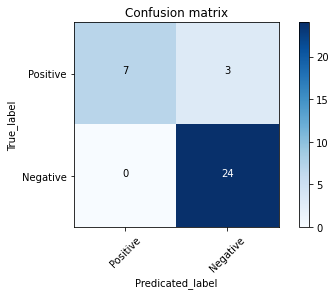

In [ ]:
#.....Confusion Matrix for Neural Network
cm = metrics.confusion_matrix(y_test,predictions )
plot_confusion_matrix(cm, classes=['Positive', 'Negative'])

**2.   Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

print('\nLogistic Regression Accuracy:', str(accuracy_score(y_test, predictions) * 100) + '%')
print(confusion_matrix(y_test, predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Logistic Regression Accuracy: 97.05882352941177%
[[ 9  1]
 [ 0 24]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Confusion matrix, without normalization


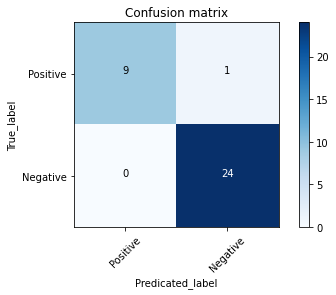

In [ ]:
#.....Confusion Matrix for logistic Regression
cm = metrics.confusion_matrix(y_test,predictions )
plot_confusion_matrix(cm, classes=['Positive', 'Negative'])

**3.   Naive Bayes**

In [ ]:
print('\nAccuracy:', str(accuracy_score(y_test, predictions) * 100) + '%')
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


Accuracy: 97.05882352941177%
[[ 9  1]
 [ 0 24]]
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        10
         1.0       0.96      1.00      0.98        24

    accuracy                           0.97        34
   macro avg       0.98      0.95      0.96        34
weighted avg       0.97      0.97      0.97        34



Confusion matrix, without normalization


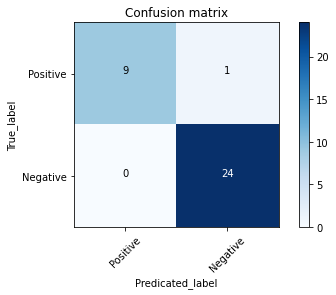

In [ ]:
#.....Confusion Matrix for naive Bayes
cm = metrics.confusion_matrix(y_test,predictions )
plot_confusion_matrix(cm, classes=['Positive', 'Negative'])

**Comparison of algorithms**

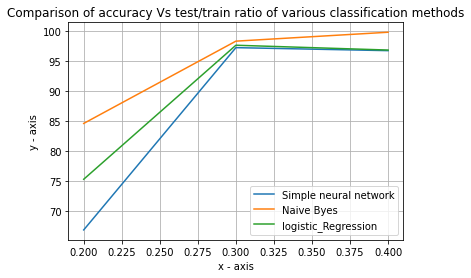

In [ ]:
import matplotlib.pyplot as plt

# line 1 points
x1 = [0.20,0.30,0.40]
y1 = [66.9,97.20,96.70]
# plotting the line 1 points
plt.plot(x1, y1, label = "Simple neural network")

# line 2 points
x2 = [0.20,0.30,0.40]
y2 = [84.6,98.28,99.76]
# plotting the line 2 points
plt.plot(x2, y2, label = "Naive Byes")

# line 3 points
x3 = [0.20,0.30,0.40]
y3= [75.32,97.6,96.8]
# plotting the line 2 points
plt.plot(x3, y3, label = "logistic_Regression")

# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
# giving a title to my graph
plt.title('Comparison of accuracy Vs test/train ratio of various classification methods')

# show a legend on the plot
plt.legend()

# function to show the plot
plt.grid()
plt.show()